In [1]:
import matplotlib.pyplot as plt
import time
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


# CLARANS do pyclustering
from pyclustering.cluster.clarans import clarans
from pyclustering.utils import timedcall

In [2]:
# 1. Gerando dados (duas "luas" + ruído)
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

In [3]:
# 2. Aplicando DBSCAN
start_time = time.time()
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)
time_dbscan = time.time() - start_time

In [4]:
# Silhouette Score DBSCAN (só se tiver pelo menos 2 clusters válidos)
score_dbscan = None
if len(set(labels_dbscan)) > 1 and -1 not in set(labels_dbscan):
    score_dbscan = silhouette_score(X, labels_dbscan)

In [5]:
# 3. Aplicando CLARANS (precisa definir k = nº de clusters)
# Aqui sabemos que são 2 clusters
(ticks, result) = timedcall(lambda: clarans(X.tolist(), number_clusters=2, numlocal=1, maxneighbor=5).process())
clarans_instance = result
clusters = clarans_instance.get_clusters()
labels_clarans = [-1] * len(X)
for cluster_id, cluster_points in enumerate(clusters):
    for point in cluster_points:
        labels_clarans[point] = cluster_id
time_clarans = ticks

In [6]:
# Silhouette Score CLARANS
score_clarans = silhouette_score(X, labels_clarans)

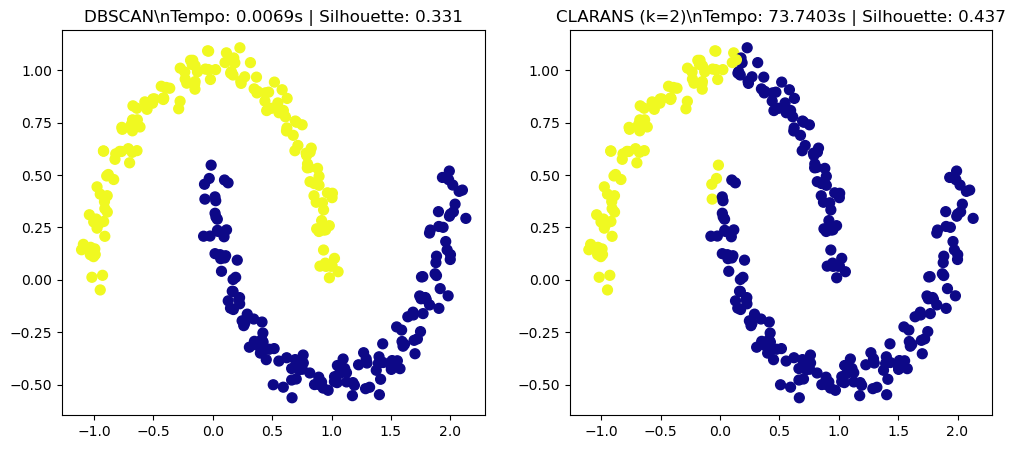

In [7]:
# 4. Visualização lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# DBSCAN
axes[0].scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap="plasma", s=50)
axes[0].set_title(f"DBSCAN\\nTempo: {time_dbscan:.4f}s | Silhouette: {score_dbscan:.3f}" 
                  if score_dbscan else f"DBSCAN\\nTempo: {time_dbscan:.4f}s | Silhouette: N/A")

# CLARANS
axes[1].scatter(X[:, 0], X[:, 1], c=labels_clarans, cmap="plasma", s=50)
axes[1].set_title(f"CLARANS (k=2)\\nTempo: {time_clarans:.4f}s | Silhouette: {score_clarans:.3f}")

plt.show()